In [12]:
import numpy as np
import yt
import matplotlib.pyplot as plt

In [21]:
# load data
ds = yt.load("plot/plt00200")

# print some information about sim
ds.print_stats()

yt : [INFO     ] 2024-02-17 18:06:03,935 Parameters: current_time              = 0.2
yt : [INFO     ] 2024-02-17 18:06:03,937 Parameters: domain_dimensions         = [64 16 16]
yt : [INFO     ] 2024-02-17 18:06:03,937 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-17 18:06:03,938 Parameters: domain_right_edge         = [1. 1. 1.]


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         16384	            26
----------------------------------------------
   	     1	         16384


t = 2.00000000e-01 = 2.00000000e-01 s = 6.33761756e-09 years

Smallest Cell:
	Width: 5.064e-27 Mpc Mpc
	Width: 5.064e-21 pc pc
	Width: 1.044e-15 AU AU
	Width: 1.562e-02 cm cm


In [22]:
xaxis = 0  # take a line cut along the x axis
lineout = ds.ortho_ray(xaxis, (0, 0))   # cutting through the xaxis

srt = np.argsort(lineout["index", "x"]) # sort according to x position
rho = np.array(lineout["boxlib", "Density"][srt]) # get the variable

/tmp/ipykernel_86136/1667156913.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(data[:,0], data[:,1],'ro',label="exact",color='C1',markersize=1.0)


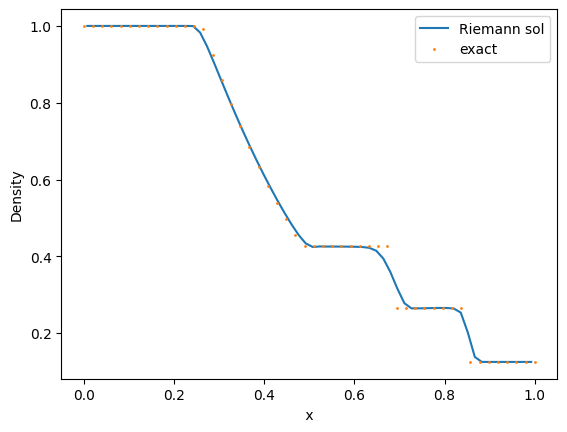

In [24]:
# plot solutions
plt.plot(np.array(lineout["index", "x"][srt]),rho,label="Riemann sol")
plt.ylabel("Density")
plt.xlabel(' x ', horizontalalignment='center')

data = np.loadtxt('exact.dat')
plt.plot(data[:,0], data[:,1],'ro',label="exact",color='C1',markersize=1.0)

plt.legend()
plt.show()
# Save the line plot into a file
plt.save()